In [1]:
import audio_processing as ap
import audio_utils as au
import math
import numpy.fft as fft
import matplotlib.pyplot as plt
%matplotlib inline

# CS 328 Final Project
## Thomas Bertschinger and Sanders McMillan
### Lab Notebook

### Tuesday, April 26, 2016 **(joint entry)**

Our final project will (likely) be *model* focused rather than experiment focused. We will "implemenet computational model(s) and compare results to existing human data." In this case, the human data will be musical compositions created by humans (*e.g.* Bach fugues) and our model will be a system that "composes" music (perhaps learning from human compositions). 

We set up a bibliography using Latex and BibTex, and a git repository to keep track of our code and materials. 

https://github.com/bertschingert/cs328-final/tree/master/references

### Wednesday, April 27, 2016 (joint entry)

We are thinking about doing a signal-processing based model that creates a representation of a signal and can classify the signal into categories such as instrument family, voice, etc. We will need to create a representation of audio sound in a (hopefully) small number of dimensions that includes enough relevant information so that we can classify a sound into a category such as brass versus string instrument, for example. 

The representation will likely include attributes such as attack and decay time of the waveform; the spectrum at various points in time; how much the spectrum changes over time; irregularities in the spectrum. 

Our model will ideally be able to classify instruments correctly at different amplitudes and pitches. It would also be important to limit the model to audio information that humans can actually percieve. (For example, it wouldn't make sense for our model to take into account frequences substantially above 20,000Hz because humans cannot hear that high.) 

Being able to pull out the relevant information from an audio signal is important because it will help us understand how humans can do things such as distinguish different people's voices. We know probably hundreds of different voices that we can identify from only a few words of speech. This is also important for being able to recognize different instruments present in a single audio signal. 

We think it would be plausible to create a neural network to identify different audio signals. We will first take an audio signal and use tools such as the discrete Fourier transform to create a suitable representation of the signal that omits extraneous information or information that humans cannot perciever. Then, we train a neural network to be able to identify, from the features of the representation, what category the signal belongs to. 

Theoretically, our model will be grounded in the similarity models learned earlier in this course, in addition to Gibsonian and Gestalt principles of perceiving invariants in stimuli and grouping similar and proximal stimuli as belonging to the same perceptual unit (e.g. being able to classify a signal as being of a certain category regardless of it's amplitude and signal, and classifying/perceiving similar successive waveforms as being from the same instrument). It will also involve the place and time theories for how humans transform air pressure hitting the ear into an auditory representation (which is where our Fourier transform and representation stages come in). 

### Monday, May 16, 2016 (joint entry)

We have written some code to do basic audio processing (FFT). We are also starting to create the NN..

In order to keep the neural network consistent, we will have the option to save weights and biases to a text file so that they can be loaded. 

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


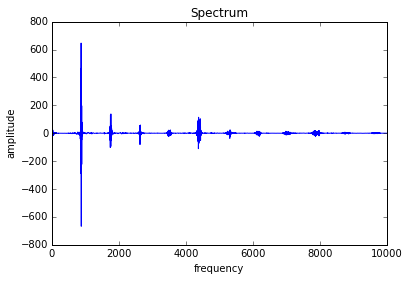

In [2]:
left, right = au.read_raw_stereo("audio_files/violin-a440.raw")
chunk = left[:44100]
freqs = fft.rfft(chunk)
au.graph_fft(freqs[:10000])

We also started compiling our audio sample library. The audio samples are 1.5 second long clips downloaded from http://www.philharmonia.co.uk/explore/make_music. So far we have 5 different instruments (guitar, saxophone, flute, violin, and trumpet), each at three different pitches (A, C, and E). The octaves of the pitches are different for each instrument as the library did not contain all octaves for each instrument, and each instrument has different pitch restraints.

### Tuesday, May 17, 2016 (joint entry)

We are starting to write code that uses the FFT to get some information on the signal, such as attack time. This will be helpful for our representation. We are also starting to implement the neural network. 

### Saturday, May 21, 2016

Created the Hann window function. 

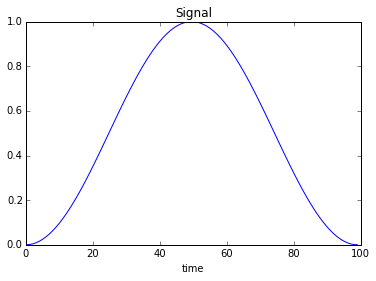

In [3]:
test_signal = []
for i in range(100):
    test_signal.append(1)
w = au.hann_window(test_signal)
au.graph_signal(w)

Created code to compute the spectral centroid

before window: spectral centroid is  439.980046321


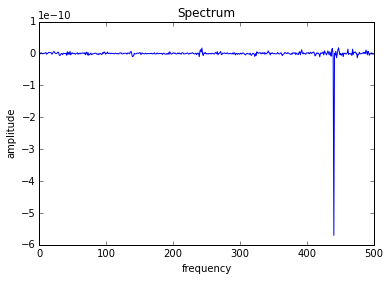

In [4]:
wave = au.create_sine_wave(440, 1, 1)
spectrum = fft.rfft(wave)
print("before window: spectral centroid is ", ap.get_spectral_centroid(spectrum, 44100))
au.graph_fft(spectrum[:500])

after window: spectral centroid is  439.980068349


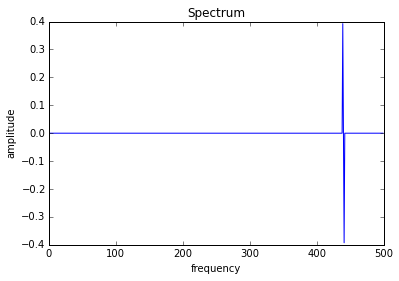

In [6]:
w_signal = ap.hann_window(wave)
w_spectrum = fft.rfft(w_signal)
print("after window: spectral centroid is ", ap.get_spectral_centroid(w_spectrum, 44100))
au.graph_fft(w_spectrum[:500])